Código que extrae las propiedades de las partículas estelares de las Auriga Level 3 de baja masa.

In [1]:
from loadmodules import *
import numpy as np
import matplotlib.pyplot as plt
#/data/repository/level3_MHD/halo_24/output/snapdir_063/
from scipy.stats import binned_statistic_2d, binned_statistic

In [2]:
def StellarDensity2D(x,y,weights,minMax=None,statistic='sum',npix = [250,250],style='SB'):
    if minMax==None: minMax=[ min([min(x),min(y)]),max([max(x),max(y)]) ]
        
    grid, _x, _y, _ = binned_statistic_2d(x, y, weights, statistic, bins=npix)#, range=[minMax,minMax])
    box=np.abs(_x[1]-_x[0])#k['box']
    #minMax = [0, 1]
    
    if style=='normal': return grid,box
    if statistic=='sum':
        
        if style=='SB':
            #box_arcsec = np.rad2deg(np.arctan(box*1000/10))*(60*60)
            box_arcsec = (box*1000/10)*((180*60*60)/np.pi)
            return grid / box_arcsec**2,_x,_y,box
        if style=='SD':
            return grid / box**2,_x,_y,box
    if statistic!='sum':
        print('statistic i not sum')
        raise SystemExit

In [4]:
ls /virgo/simulations/Auriga/level3_MHD/halo_6/output/

balance.txt                metals_gas.txt
bh_pressure_threshold.txt  metals_stars.txt
blackhole_details/         metals_tot.txt
blackhole_mergers/         parameters-usedvalues
blackholes.txt             radio_mode_eff_vs_vvir.txt
cont                       rotmatlist_halo_6.txt
cpu.txt                    sfr.txt
domain.txt                 snapdir_000/
energy.txt                 snapdir_001/
galcen_halo_6.txt          snapdir_002/
groups_000/                snapdir_003/
groups_001/                snapdir_004/
groups_002/                snapdir_005/
groups_003/                snapdir_006/
groups_004/                snapdir_007/
groups_005/                snapdir_008/
groups_006/                snapdir_009/
groups_007/                snapdir_010/
groups_008/                snapdir_011/
groups_009/                snapdir_012/
groups_010/                snapdir_013/
groups_011/                snapdir_014/
groups_012/                snapdir_015/
groups_013/                snapdir_016/
group

In [6]:
# Determino el número de snapshot, el factor de escala y el path
snap = 63#251
fac_esc = 1      # z = 0

In [7]:
# Defino parámetros a utilizar
h_0 = 0.06777
omega_lambda= 0.693
omega_m=0.307
w = omega_m / (omega_lambda*(fac_esc**3))
hubble_t = h_0 * np.sqrt(omega_lambda * np.sqrt(1+w))
hubble_t

0.06183306781047614

In [8]:
# Defino la lista con los campos que pido para los subhalos
fields_subhalo = ['flty','spos','sidm','fpos','frc2','slty','svel','fnsh']

In [9]:
num_particulas = []   # lista que contendrá la cantidad de partículas estelares de todas las Auriga
haloslist=[6,16,21,24,27,23]
i =21
#path = '../../../../../data/repository/level3_MHD_10/halo_%s/output/'%i
path = '/virgo/simulations/Auriga/level3_MHD/halo_%s/output/'%i

In [16]:
# Cargo la información de los subhalos / EL CATALOGO
sf = load_subfind(snap, dir=path, loadonly=None)
lenstars  = sf.data['slty'][0,4]
print('Cantidad de partículas estelares del halo con ID=0:', lenstars, '(Auriga %s)'%i)



AttributeError: 'Dataset' object has no attribute 'value'

In [9]:
sf.data.keys()

dict_keys(['fbhm', 'fbhd', 'fgcm', 'ffsh', 'fgmf', 'fgmt', 'flen', 'flty', 'fmas', 'fmty', 'fnsh', 'fpos', 'fsfr', 'fsmf', 'fsmt', 'fvel', 'gwim', 'fmc2', 'fmc5', 'fmm2', 'fmt2', 'frc2', 'frc5', 'frm2', 'frt2', 'sbhm', 'sbhd', 'scmp', 'sgmf', 'sgmh', 'sgmx', 'sgms', 'sgmw', 'sgmt', 'sgth', 'sgtx', 'sgts', 'sgtw', 'sgnr', 'shmr', 'shmt', 'sidm', 'slen', 'slty', 'smas', 'smih', 'smht', 'smim', 'smmt', 'smir', 'smit', 'smty', 'sprt', 'spos', 'ssfr', 'sshr', 'ssxr', 'ssfi', 'sspi', 'ssmf', 'ssfh', 'ssfx', 'ssmt', 'ssth', 'sstx', 'ssph', 'sspm', 'sspr', 'svel', 'svdi', 'svmx', 'svrx', 'swim'])

In [14]:
# Pido la información /Cargo las particulas del snapshot
s = gadget_readsnap(snap, snappath=path, hdf5=True, loadonlytype=4, loadonlyhalo=0, subfind=sf, loadonly=['pos','vel','id','age','mass','pot','type', 'gsph', 'gz','accf'])

# Calculo la edad de las partículas estelares en Gyr
part_ages = s.data['age']          # entrega el factor de escala
part_agesGyr = s.cosmology_get_lookback_time_from_a(part_ages, is_flat=True)
    


NameError: name 'sf' is not defined

In [11]:
s.data_type4

<IndexDict for restricted index range with the following keys:
 dict_keys(['pos', 'gz', 'mass', 'id', 'pot', 'vel', 'type', 'age', 'gsph'])

Total particles per type: [16890280 38116578        0        0 24896119        3]
---> (79902980, 3) (24896119,) (24896119,)
---> (24896119, 3) (24896119,)
Cantidad de partículas de tipo 4: 24896119


<ipython-input-18-f4bf155d2430>:27: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(H),cmap='cubehelix')


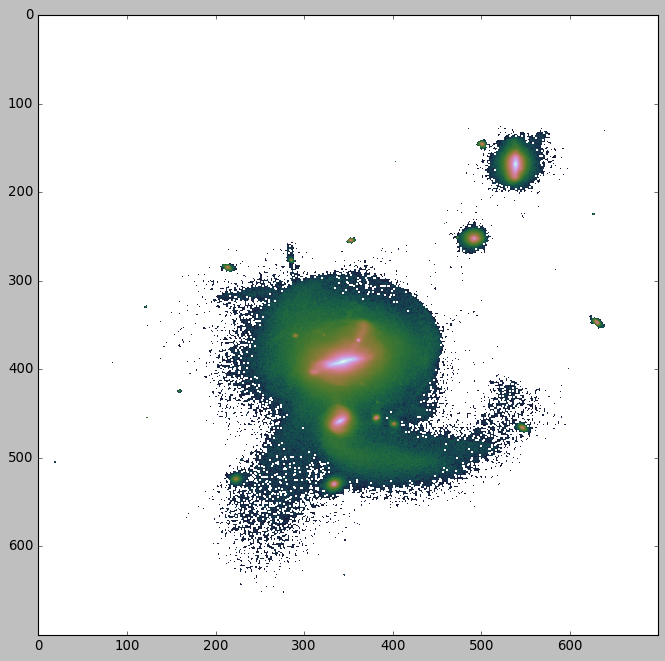

In [18]:
# Armo una máscara que seleccione solamente las partículas de tipo 4
istars = (s.data['type'] == 4)
    
a = s.calc_sf_indizes(sf, verbose=True)

# Descomentar si se quiere rotar las partículas con esta función    | NO FUNCIONA CON LAS LEVEL 3 LOW MASS
#s.select_halo(sf, age_select = 3., use_cold_gas_spin=False, do_rotation=True)    # corte de edades en 3Gyr
print('--->',s.data['vel'].shape,part_agesGyr.shape,part_ages.shape)    
# Selecciono los datos correspondientes solamente a las partículas estelares
smass = s.data['mass'][istars]
spos = s.data['pos'][istars]     # las coordenadas (x,y,z) se corresponden con los índices (2,1,0)
svel = s.data['vel'][istars] # las velocidades (vx,vy,vz) se corresponden con los índices (2,1,0)
print('--->',svel.shape,part_agesGyr.shape)
age = part_agesGyr
pot = s.data['pot'][istars]
partID = s.data['id'][istars]
stellarphotometry = s.data['gsph']   # orden de los filtros: U, B, V, K, g, r, i, z
metallicity = s.data['gz']
#accr = s.data['accf']
print('Cantidad de partículas de tipo 4:', len(spos))
#set(accr)
H,_x,_y,box = StellarDensity2D(spos[:,0],spos[:,1],smass,npix = [700,700],style='SD')

plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
#plt.scatter(spos[:,0],spos[:,1])
plt.imshow(np.log10(H),cmap='cubehelix')

Cantidad de partículas de tipo 4 del subhalo de ID=0: 19107866


<ipython-input-13-dca898187c87>:18: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(H),cmap='cubehelix')


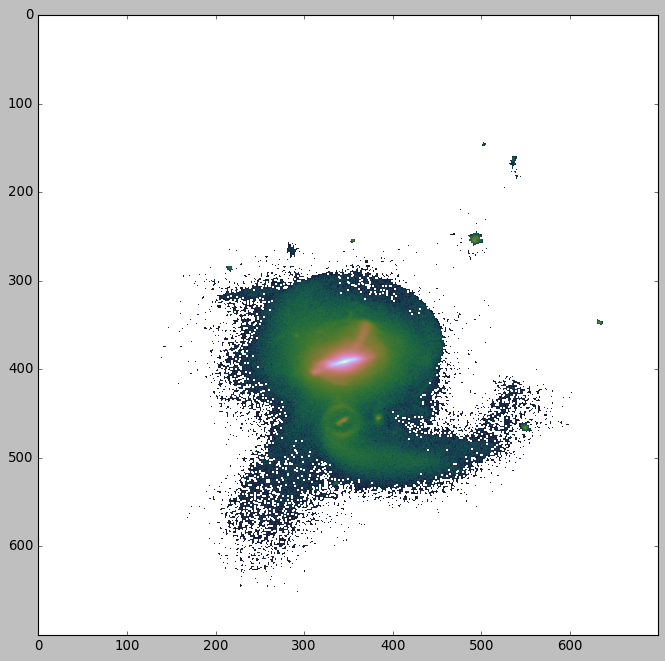

In [13]:
    
# Me quedo solamente con las del subhalo de ID=0
nstars = sf.data['slty'][0,4]      # máscara que indica la cantidad de partículas estelares del subhalo de ID=0
smass = smass[:nstars]
spos = spos[:nstars]             # multiplicar por 1000 si se quiere guardarlo en kpc
svel = svel[:nstars]
age = age[:nstars]
pot = pot[:nstars]
partID = partID[:nstars]
stellarphotometry = stellarphotometry[:nstars]
    
metallicity = metallicity[:nstars]
print('Cantidad de partículas de tipo 4 del subhalo de ID=0:', len(spos))

H,_x,_y,box = StellarDensity2D(spos[:,0],spos[:,1],smass,npix = [700,700],style='SD')
#plt.scatter(spos[:,0],spos[:,1])

plt.figure(figsize=(10,10))
plt.imshow(np.log10(H),cmap='cubehelix')
    


In [14]:
sf.data['spos'][0,:]

array([51.3376  , 53.328026, 51.565857], dtype=float32)

In [15]:
# CORRER ESTA PARTE SÓLO SI PREVIAMENTE NO SE USÓ LA FUNCIÓN "select_halo" PARA ROTAR LAS PARTÍCULAS
# ----------------------------------------------
# Centro las posiciones y las velocidades de las partículas seleccionadas
pos_centradas = spos[:]-sf.data['spos'][0,:]
vel_centradas = svel[:]-sf.data['svel'][0,:]
    
# Guardo los datos en archivos de texto
datos = np.asarray([pos_centradas[:,0],pos_centradas[:,1],pos_centradas[:,2],vel_centradas[:,0],vel_centradas[:,1],vel_centradas[:,2],smass,age, pot, partID, metallicity, stellarphotometry[:,0], stellarphotometry[:,1], stellarphotometry[:,2], stellarphotometry[:,3], stellarphotometry[:,4], stellarphotometry[:,5], stellarphotometry[:,6], stellarphotometry[:,7]])
#np.savetxt('DataStelPartAuriga%s_Lvl3LowMass.txt' %i, datos)
    
num_particulas += [nstars]
print('-------------------------------')
# Guardo la lista con el número de partículas estelares en un archivo de texto
#np.savetxt('CantPartEstelares_AurigaLvl3LowMass.txt', num_particulas)

-------------------------------


In [1]:
__name__

'__main__'

In [2]:

import multiprocessing